In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/Users/philchodrow/Documents/teaching/ml-notes/source':
  os.chdir(r'/Users/philchodrow/Documents/teaching/ml-notes/source')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


/var/folders/xn/wvbwvw0d6dx46h9_2bkrknnw0000gn/T/ipykernel_35045/949127318.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/importlib/_bootstrap.py": 1669300367.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/importlib/_bootstrap_external.py": 1669300367.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/codecs.py": 1669300365.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/encodings/aliases.py": 1669300368.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/encodings/__init__.py": 1669300368.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/encodings/utf_8.py": 1669300368.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/encodings/latin_1.py": 1669300368.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/abc.py": 1669300365.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/io.py": 1669300365.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/stat.py": 1669300365.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3

In [2]:
#| code-fold: true
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
np.set_printoptions(precision = 3)
plt.style.use('seaborn-v0_8-whitegrid')

url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/credit-risk/credit_risk_dataset.csv"

In [3]:
#| echo: false
pd.options.mode.chained_assignment = None  

In [4]:
df_all = pd.read_csv(url)
df = df_all[["loan_int_rate", "loan_percent_income", "loan_status"]]
df = df.dropna()

In [5]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 123) # 20% test set

In [6]:
X_train = df_train[["loan_int_rate", "loan_percent_income"]]
y_train = df_train["loan_status"]

X_test = df_test[["loan_int_rate", "loan_percent_income"]]
y_test = df_test["loan_status"]

In [7]:
#| echo: false
n = df_train.shape[0]

In [8]:
#| eval: false

s = [] # vector of scores
for i in range(n):
    s.append(compute_score(X[i], w))

In [9]:
#---
def linear_score(X, w):
    return X@w
#---

In [10]:
#---
w = np.array([0.01, 1.0])
s = linear_score(X_train, w)
#---

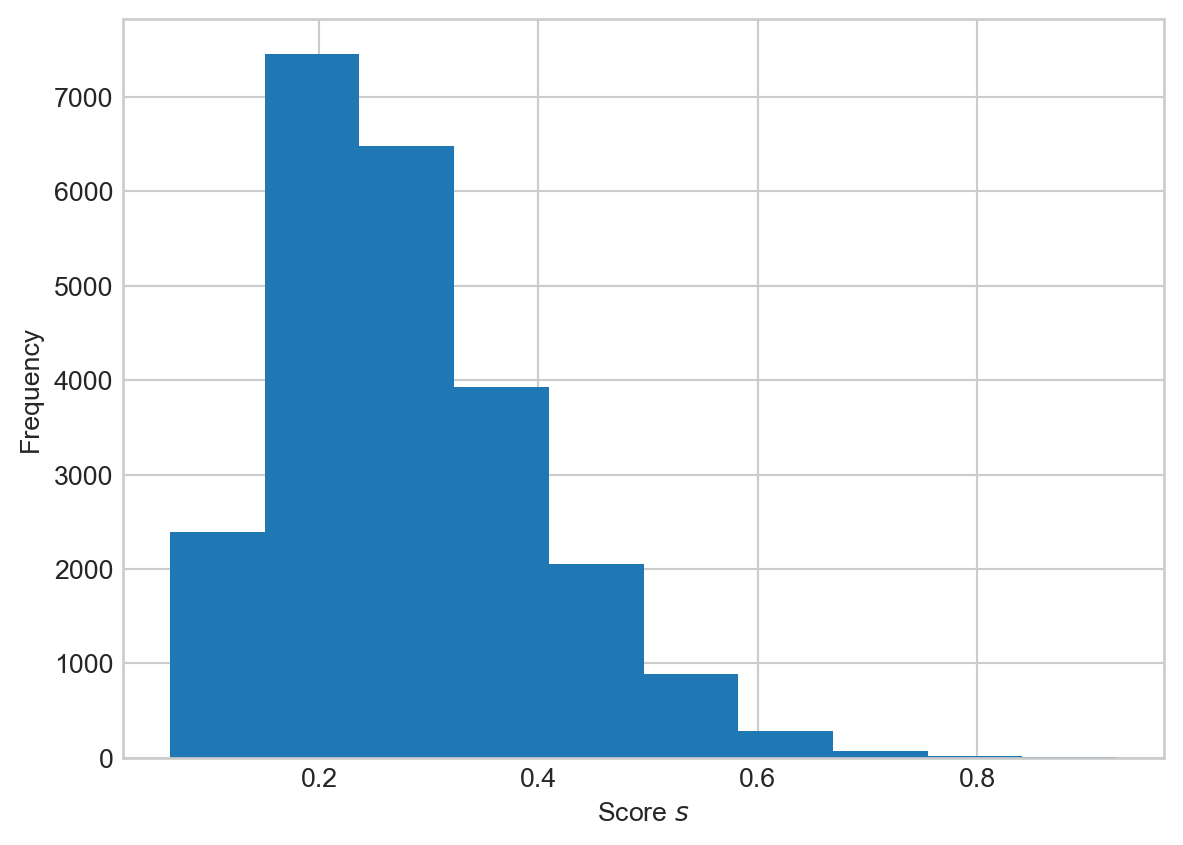

In [11]:
hist = plt.hist(s)
labs = plt.gca().set(xlabel = r"Score $s$", ylabel = "Frequency") 

In [12]:
#---
t = 0.4
preds = s >= t
preds.mean()
#---

0.15386899711522145

In [13]:
for t in np.linspace(0, 1, 11):
#---
    y_pred = s >= t
    acc = (y_pred == y_train).mean()
#---
    print(f"A threshold of {t:.1f} gives an accuracy of {acc:.2f}.")

A threshold of 0.0 gives an accuracy of 0.22.
A threshold of 0.1 gives an accuracy of 0.23.
A threshold of 0.2 gives an accuracy of 0.46.
A threshold of 0.3 gives an accuracy of 0.71.
A threshold of 0.4 gives an accuracy of 0.82.
A threshold of 0.5 gives an accuracy of 0.80.
A threshold of 0.6 gives an accuracy of 0.79.
A threshold of 0.7 gives an accuracy of 0.78.
A threshold of 0.8 gives an accuracy of 0.78.
A threshold of 0.9 gives an accuracy of 0.78.
A threshold of 1.0 gives an accuracy of 0.78.


In [14]:
#---
t = 0.5
y_pred = s >= t 

# number where outcome == 0 and prediction == 1
((y_train == 0)*(y_pred == 1)).sum()
#---

286

In [15]:
from sklearn.metrics import confusion_matrix

#---
confusion_matrix(y_train, y_pred)
#---

array([[18062,   286],
       [ 4319,   905]])

In [16]:
#---
confusion_matrix(y_train, y_pred, normalize = "true")
#---

array([[0.984, 0.016],
       [0.827, 0.173]])

In [17]:
# agrees with the top right corner of the normalized confusion matrix
#---
((y_pred == 1) & (y_train == 0)).sum() / (y_train == 0).sum()
#---

0.015587529976019185

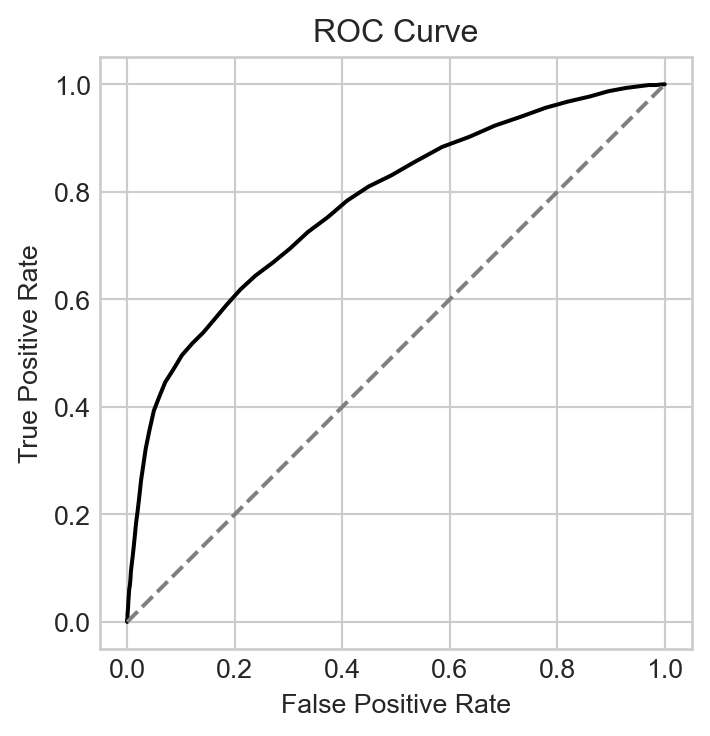

In [18]:
fig, ax = plt.subplots(1, 1, figsize = (6, 4))

num_thresholds = 101

FPR = np.zeros(num_thresholds)
TPR = np.zeros(num_thresholds)
T = np.linspace(s.min()-0.1, s.max()+0.1, num_thresholds)
s    = linear_score(X_train, w)

for i in range(num_thresholds):
    t = T[i]
    preds    = s >= t
    FPR[i]   = ((preds == 1) & (y_train == 0)).sum() / (y_train == 0).sum()
    TPR[i]   = ((preds == 1) & (y_train == 1)).sum() / (y_train == 1).sum()

ax.plot(FPR, TPR, color = "black")
ax.plot([0,1], [0,1], linestyle="--", color = "grey")
ax.set_aspect('equal')

labs = ax.set(xlabel = "False Positive Rate", ylabel = "True Positive Rate", title = "ROC Curve")

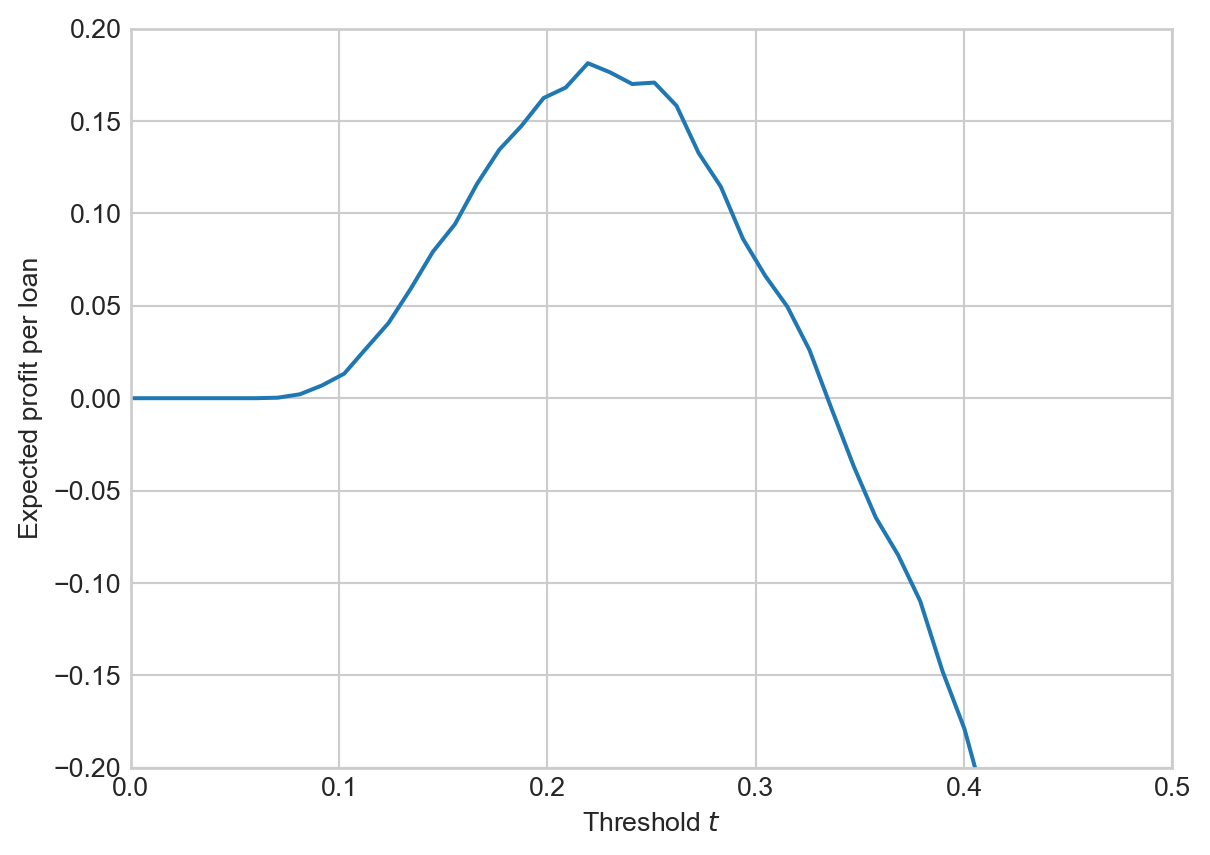

In [19]:
TNR = 1 - FPR
FNR = 1 - TPR

cost_of_FN = -2.0
gain_of_TN = 1.0

gain =  gain_of_TN*TNR  + cost_of_FN*FNR 

plt.plot(T, gain)
plt.gca().set(ylim = (-0.2, 0.2), xlim = (0, 0.5))
labs = plt.gca().set(xlabel = r"Threshold $t$", ylabel = "Expected profit per loan")

In [20]:
t = 0.21

# compute the scores
s     = linear_score(X_test, w)
preds = s >= t

# compute error rates
FPR   = ((preds == 1) & (y_test == 0)).sum() / (y_test == 0).sum()
TPR   = ((preds == 1) & (y_test == 1)).sum() / (y_test == 1).sum()

TNR = 1 - FPR
FNR = 1 - TPR

# compute the expected gain
gain = gain_of_TN*TNR  + cost_of_FN*FNR 
gain

0.17641653321131712

In [21]:
df_all.groupby("loan_intent").size()

loan_intent
DEBTCONSOLIDATION    5212
EDUCATION            6453
HOMEIMPROVEMENT      3605
MEDICAL              6071
PERSONAL             5521
VENTURE              5719
dtype: int64